## Observations and Insights 

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

# Combine the data into a single dataset

mouse_merge = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview

mouse_merge




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [51]:
# Checking the number of mice.

total_mice = mouse_merge["Mouse ID"].nunique()
total_mice 




249

In [52]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID = mouse_merge.loc[mouse_merge.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_ID
                


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#noduplicate_mice = mouse_merge.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

df_clean = mouse_merge.loc[mouse_merge['Mouse ID'] !="g989"]
df_clean


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

total_mice = df_clean["Mouse ID"].nunique()
total_mice


248

## Summary Statistics

In [7]:
#First: Rename Column "Tumor Volume" to remove parentheses

df_clean = df_clean.rename(columns={"Tumor Volume (mm3)": "Tumor Volume"})

df_clean.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.


tumor_volume_mean = df_clean.groupby(['Drug Regimen']).mean()['Tumor Volume']
#tumor_volume_mean = tumor_volume_mean.rename(columns={"Tumor Volume": "TV Mean"})
#tumor_volume_mean

tumor_volume_median = df_clean.groupby(['Drug Regimen']).median()['Tumor Volume']

#tumor_volume_variance = noduplicate_mice.groupby(['Drug Regimen', 'Tumor Volume']).var()
tumor_volume_var = df_clean.groupby(['Drug Regimen']).var()['Tumor Volume']

#tumor_volume_std = noduplicate_mice.groupby(['Drug Regimen', 'Tumor Volume']).std()
tumor_volume_std = df_clean.groupby(['Drug Regimen']).std()['Tumor Volume']

#tumor_volume_sem = noduplicate_mice.groupby(['Drug Regimen', 'Tumor Volume']).sem()
tumor_volume_sem = df_clean.groupby(['Drug Regimen']).sem()['Tumor Volume']

summary_df = pd.DataFrame({'Mean TV': tumor_volume_mean, "Median TV": tumor_volume_median, "Variance TV": tumor_volume_var, 
                          "STD TV": tumor_volume_std, "SEM TV": tumor_volume_sem})

summary_df



,Mean TV,Median TV,Variance TV,STD TV,SEM TV
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

summary_statistics = df_clean.groupby("Drug Regimen").agg({"Tumor Volume":["mean","median","var","std","sem"]})
summary_statistics


Tumor Volume                                          
                     mean     median        var       std       sem
Drug Regimen                                                       
Capomulin       40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin        52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol       52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril        55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol        54.331565  52.509285  66.173479  8.134708  0.596466
Placebo         54.033581  52.288934  61.168083  7.821003  0.581331
Propriva        52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane        40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn        54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol       53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#First, create df for regimen and number of mice
barplot_table = df_clean.groupby(['Drug Regimen'])['Mouse ID'].count()
barplot_table

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

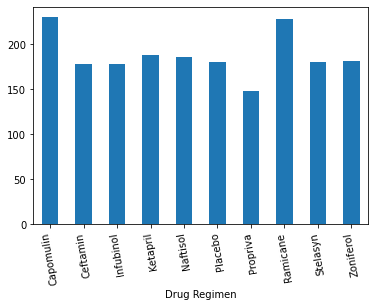

In [11]:
panda_barplot = barplot_table.plot.bar(x='Drug Regimen', y='Mouse ID', rot=100)
panda_barplot

<BarContainer object of 10 artists>

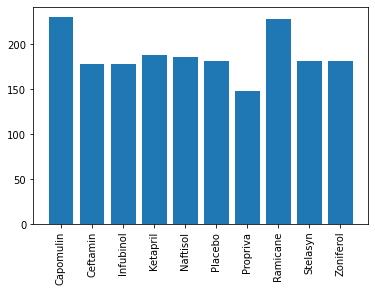

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

pyplot_barplot = plt.bar(barplot_table.index.values, barplot_table.values)
plt.xticks(rotation=90)
pyplot_barplot



In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pieplot_table = df_clean.groupby(['Sex']).count()['Mouse ID']

pieplot_table
                                         
                                         


Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

([<matplotlib.patches.Wedge at 0x7faf04f59a00>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')],
 [Text(0.018044734954153967, 0.5997285948997549, '49.0%'),
  Text(-0.018044734954153905, -0.5997285948997549, '51.0%')])

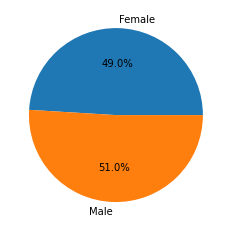

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
 
panda_pieplot = plt.pie(pieplot_table.values, labels=pieplot_table.index.values,autopct="%1.1f%%")

panda_pieplot


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



# Start by getting the last (greatest) timepoint for each mouse

max_mouse = df_clean.groupby('Mouse ID').max()['Timepoint']
max_mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(max_mouse, df_clean, on=['Mouse ID', "Timepoint"], how="left")
merge_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume,Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)


drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_volume_list = []

for x in drug_list:
    drug_tumor_volume = merge_df.loc[merge_df['Drug Regimen']==x, 'Tumor Volume']
    
    #print(drug_tumor_volume)
    
    tumor_volume_list.append(drug_tumor_volume)



# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    quartiles = drug_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = drug_tumor_volume.loc[(drug_tumor_volume < lower_bound) | (drug_tumor_volume > upper_bound)]
    print(f"{x}'s potential outliers: {outliers}")
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume, dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume, dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume, dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume, dtype: float64)


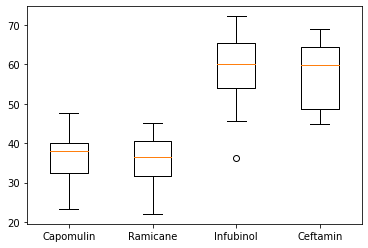

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume_list, labels=drug_list)
plt.show()

## Line and Scatter Plots

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

line_df = df_clean.loc[df_clean['Drug Regimen']=='Capomulin']
line_df

mouse_df = line_df.loc[line_df['Mouse ID']=='s185']
mouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


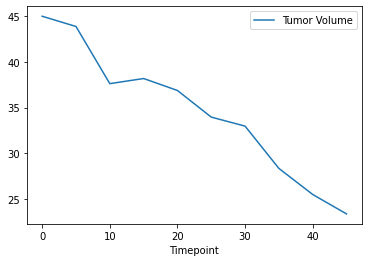

In [19]:
line_mouse = mouse_df.plot('Timepoint', 'Tumor Volume')
line_mouse

In [53]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

scatter_df = df_clean.loc[df_clean['Drug Regimen']=='Capomulin']
#mouse_weight_df = scatter_df.groupby(['Weight (g)']).mean()['Tumor Volume']
#tumor_volume_df = scatter_df.groupby(['Tumor Volume']).mean()['Weight (g)']
#mouse_weight_df

df1 = scatter_df.groupby(["Mouse ID"]).mean()

df1




,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


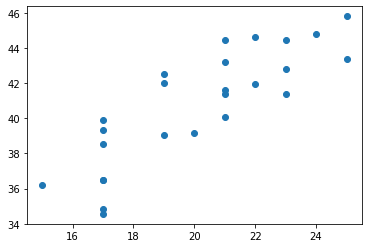

In [22]:
#Generate scatter plot

plt.scatter(df1['Weight (g)'], df1['Tumor Volume'])

plt.show()



## Correlation and Regression

In [36]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Correlation Coefficient

mw = df1['Weight (g)']
tv = df1['Tumor Volume']

correlation = st.pearsonr(mw, tv)
print(f"The correlation between both factors is {round(correlation[0],2)}")



The correlation between both factors is 0.84


In [49]:
#Linear Regression model

x = df1['Weight (g)']
y = df1['Tumor Volume']


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)


print("r-squared is:", rvalue**2)


r-squared is: 0.7088568047708717
